<a href="https://colab.research.google.com/github/MiroGasparek/DeepLearningCourse/blob/master/keras_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# Import the necessary dependencies
import numpy as np
np.random.seed(123) # for reproducibility

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.utils import np_utils

# Import matplotlib for plotting
import matplotlib.pyplot as plt

from keras.datasets import mnist


# **Introduction to Keras**

## Loading datasets from Keras 
We load the image MNIST standard dataset partitioned into their corresponding labels for test data and train data. Also, we vizualize the data, both the input data (hand-written figures) and the labels. 

In [0]:
# Now load the data, shuffled and split between the train and test sets
(X_train, y_train),(X_test, y_test) = mnist.load_data()

Image shape: (28, 28)
Total number of training samples: 60000
Total number of test samples: 10000


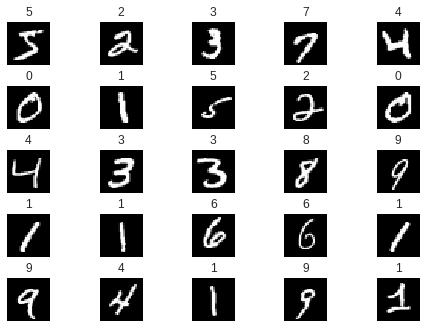

In [22]:
# Look at the images 
print('Image shape: {0}'.format(X_train.shape[1:]))
print('Total number of training samples: {0}'.format(X_train.shape[0]))
print('Total number of test samples: {0}'.format(X_test.shape[0]))

# Display some of the images
N = 5
start_val = 0 # an element for the code to plot the following N**2 values
fig, axes = plt.subplots(N, N)
items = list(range(0, 10))

for row in range(N):
  for col in range(N):
    index = start_val + row + N*col
    axes[row,col].imshow(X_train[index], cmap='gray')
    fig.subplots_adjust(hspace=0.5)
    y_target = int(y_train[index])
    target = str(items[y_target])
    axes[row,col].set_title(target)
    axes[row,col].set_xticks([])
    axes[row,col].set_yticks([])

## Preprocessing the Keras dataset
We will train a simple model to classify the digits on MNIST dataset. To do this, we will reshape images to have a single dimension. Hence the same network could be used for any 1D data. When using Convolutional Neural Network (CNN), we must define a 3D shape for images (depth, width, height) and it will get much higher results.

In [23]:
X_train_flatten = X_train.reshape(X_train.shape[0], X_train.shape[1]*X_train.shape[2])
X_test_flatten = X_test.reshape(X_test.shape[0], X_test.shape[1] * X_test.shape[2])

print('Old X_train shape: {0}'.format(X_train.shape))
print('New X_train shape: {0}'.format(X_train_flatten.shape))

# Normalize the dataset to the range [0,1] and it will be ready for training the model

X_train_flatten = X_train_flatten.astype('float32')
X_test_flatten = X_test_flatten.astype('float32')
X_train_flatten /= 255
X_test_flatten /= 255

Old X_train shape: (60000, 28, 28)
New X_train shape: (60000, 784)


Now the data are ready. To train the model, we also need to make ready the labels. The `y_train` and `y_test` labels are not split into 10 distinct labels, but rather are represented as a single array with the class values. This is good for regression problem, but we want to make a classifier. So we convert 1D value to 10D vector, each dimension representing one digit value.

In [24]:
# Convert the 1D labels value to 10D vector
Y_train_class = np_utils.to_categorical(y_train,10)
Y_test_class = np_utils.to_categorical(y_test,10)

print('New Y_train shape: {0}'.format(Y_train_class.shape))

New Y_train shape: (60000, 10)


## Model Architecture
Model architecture definition is a critical step when trying to solve a task. Here we start from the simplest model and then we go to the more complex examples. 

We first declare a sequential model, which is a linear stack of neural network layers, by passing a list of layer isntances to the constructor.

In [27]:
model = Sequential()

# Add a fully connected neural network layer with the information about the input, other layers can do inference
model.add(Dense(10, input_dim=784)) 
# Add the appropriate activation function, in this case softmax
model.add(Activation('softmax'))

# Check model shape output
print(model.output_shape)

(None, 10)


The dense layer in the model is a fully connected layer with the first parameter being the output size of the layer. Subsequently, Keras automatically handles the connections between layers. The final layer has an output size of 10, corresponding to the 10 classes of digits.

In [28]:
# Check how the model look like
model.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 10)                7850      
_________________________________________________________________
activation_3 (Activation)    (None, 10)                0         
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


## Compilation
Before we start training, we need to configure the learning process, which is done via `compile` method. We need to define three important parameters here : 
* The loss function that the model will try to minimize
* The optimiser to minimize the loss function
* The list of metrics you want the model to compute

We are doing classification, so we will define the `categorical_crossentropy` as the loss function and we will compute the accuracy metric. There are many other parameters I will explore later. 

